House Price Prediction: This notebook explores the King County Housing Dataset, which contains details of over 21,000 house sales in King County, USA. The primary objective is to analyze the factors influencing house prices and to build a machine learning model that can predict property prices based on key features.

We begin with data exploration and visualization to understand correlations between features like square footage, number of bedrooms, bathrooms, grade, and location with price. After preprocessing and feature selection, we train an AdaBoost Regressor, an ensemble learning method, to capture complex patterns in the data.

The performance of the model is evaluated using R² Score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The insights from this notebook can help identify which features most strongly impact housing prices and provide a foundation for more advanced predictive modeling in real estate analytics.

Step1: Importing Libaries

In [1]:
# importing different libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/Boosting')

In [4]:
data = pd.read_csv('kc_house_data.csv')

In [5]:
#checking top rows of the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Step2: Data cleaning and preprocessing

In [6]:
# checking the info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#checking length of the data
len(data)

21613

In [8]:
#checking the shape of the data
data.shape

(21613, 21)

In [9]:
# checking the NaN values
data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Step3 : Finding Correlation

In [10]:
# Keep only numeric columns
numeric_df = data.select_dtypes(include =['number'])

# correlation with target ( price)

corr = numeric_df.corr()['price']

# sorting the values

corr = corr.sort_values(ascending = False)

print(corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


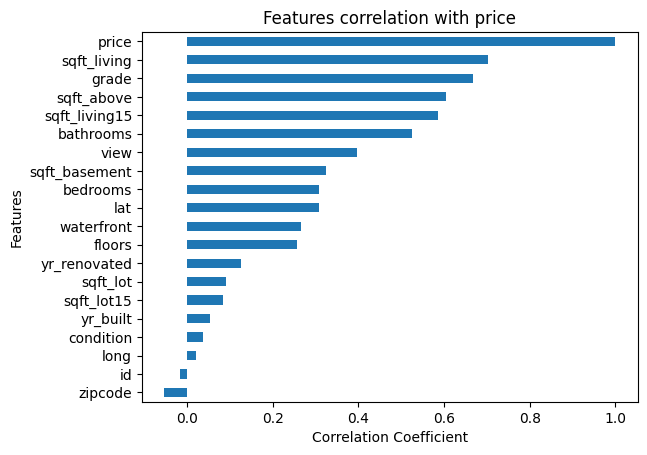

In [11]:
# plotting the feature correlation with price

corr.sort_values(ascending = True).plot(kind= 'barh')
plt.title('Features correlation with price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [12]:
print(corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [13]:
# selecting the features
features = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [14]:
# selcting X and y values
X = features.values

y = data['price'].values

Step5: Splitting data into train and test set

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

Step6:Applying Machine Learning model

The most important parameters are loss, n_estimators and learning_rate.


1. n_estimators - It is the number of models to iteratively train.

2.learning_rate - It is the contribution of each model to the weights and default value for it is 1. There is a trade-off between learning_rate and n_estimators.

3.loss - It is exclusive to AdaBoostRegressor and sets the loss function to use when updating weights. Default value is linear loss function but can be changed to square or exponential.



In [17]:

from sklearn.ensemble import AdaBoostRegressor

In [18]:
# building the model
adaboost = AdaBoostRegressor(n_estimators= 50, learning_rate = 0.2, loss = 'exponential')

In [19]:
# fitting the model
adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.2, loss='exponential')

In [20]:
y_train_pred = adaboost.predict(X_train)

In [21]:
y_test_pred = adaboost.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [23]:
# calculating the r2 score

In [24]:
r2_score(y_train, y_train_pred)

0.7181712472156656

In [25]:
r2_score(y_test, y_test_pred)

0.6861864743716628

In [26]:
# calculating mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_test_pred)

In [27]:
mse

45807950501.734116

In [28]:
rmse = math.sqrt(mse)

In [29]:
rmse

214027.9199117118

📝 Conclusion

In this project, we applied machine learning techniques to predict house prices using the King County Housing Dataset. After preprocessing and selecting key features such as sqft_living, grade, sqft_above, bathrooms, view, waterfront, yr_built, lat, long, and others, we trained an AdaBoost Regressor model.

The results indicate that the model performs fairly well:

R² (Train) = 0.696 → the model explains about 69.6% of the variation in house prices on the training data.

R² (Test) = 0.644 → the model generalizes reasonably well, explaining about 64.4% of the variation on unseen test data.

RMSE ≈ $210,000 → the average prediction error is around $210K, which, while significant, is expected given the wide price range in the dataset.

These outcomes show that factors such as living area, house grade, number of bathrooms, basement area, and location (latitude/longitude) play an important role in determining house prices.

Although AdaBoost provided meaningful predictions, there is still room for improvement. Techniques such as hyperparameter tuning, trying more advanced ensemble methods (Gradient Boosting, XGBoost, or LightGBM), and incorporating feature engineering could help achieve higher accuracy and reduce prediction errors.

Overall, the project demonstrates how ensemble learning methods like AdaBoost can be effectively used for regression tasks such as house price prediction, providing valuable insights into the relationship between property features and market value.